In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (24, 12)
np.random.seed(42)

In [95]:
df_no_guessing = pd.read_csv('data_no_guessing.csv', index_col=0)
df_fillna_knn = pd.read_csv('data_fillna_knn.csv', index_col=0)

df_log_scaled = np.log1p(df_fillna_knn.values)

from sklearn.preprocessing import StandardScaler
df_std_scaled = StandardScaler().fit_transform(df_fillna_knn.values)

df = df_log_scaled

### K-Means:

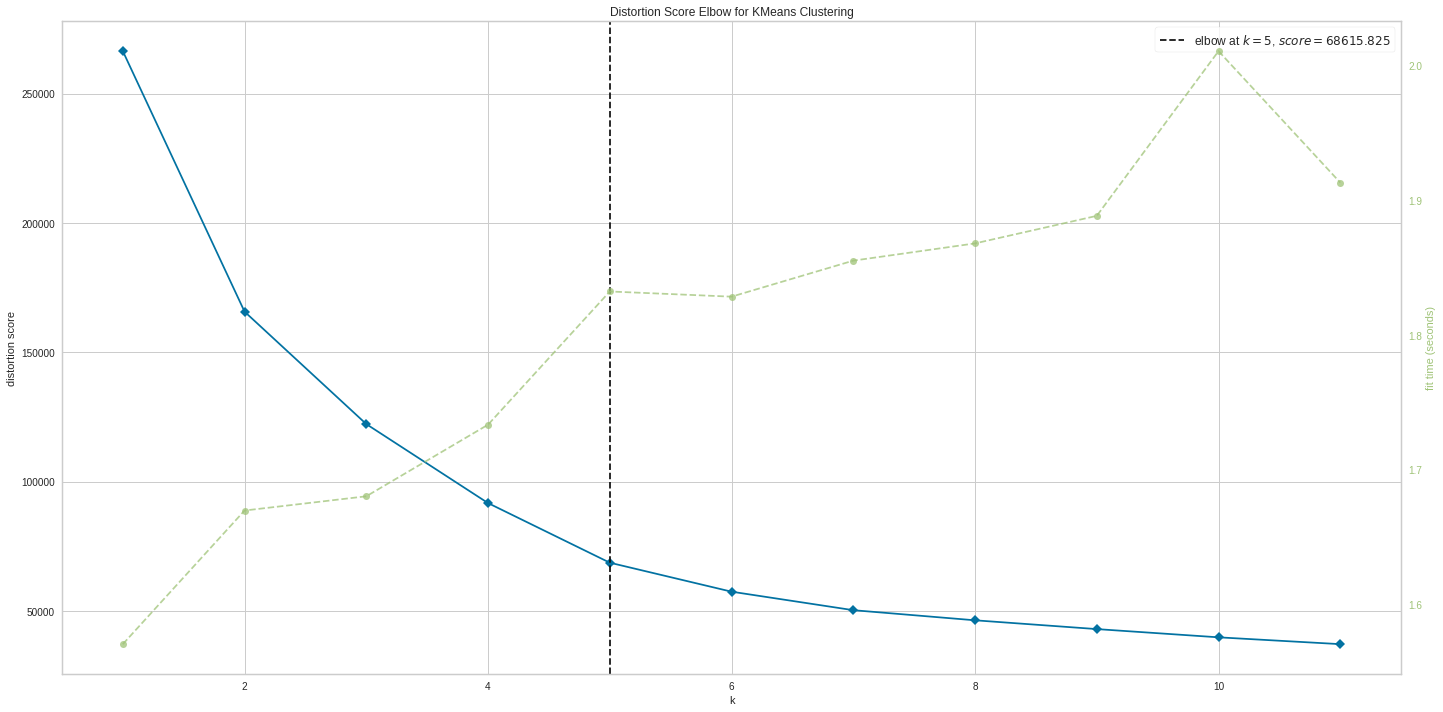

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# use KElbowVisualizer to choose best K
# first for pure data (df_no_guessing)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(np.log1p(df_no_guessing.values))
visualizer.show()

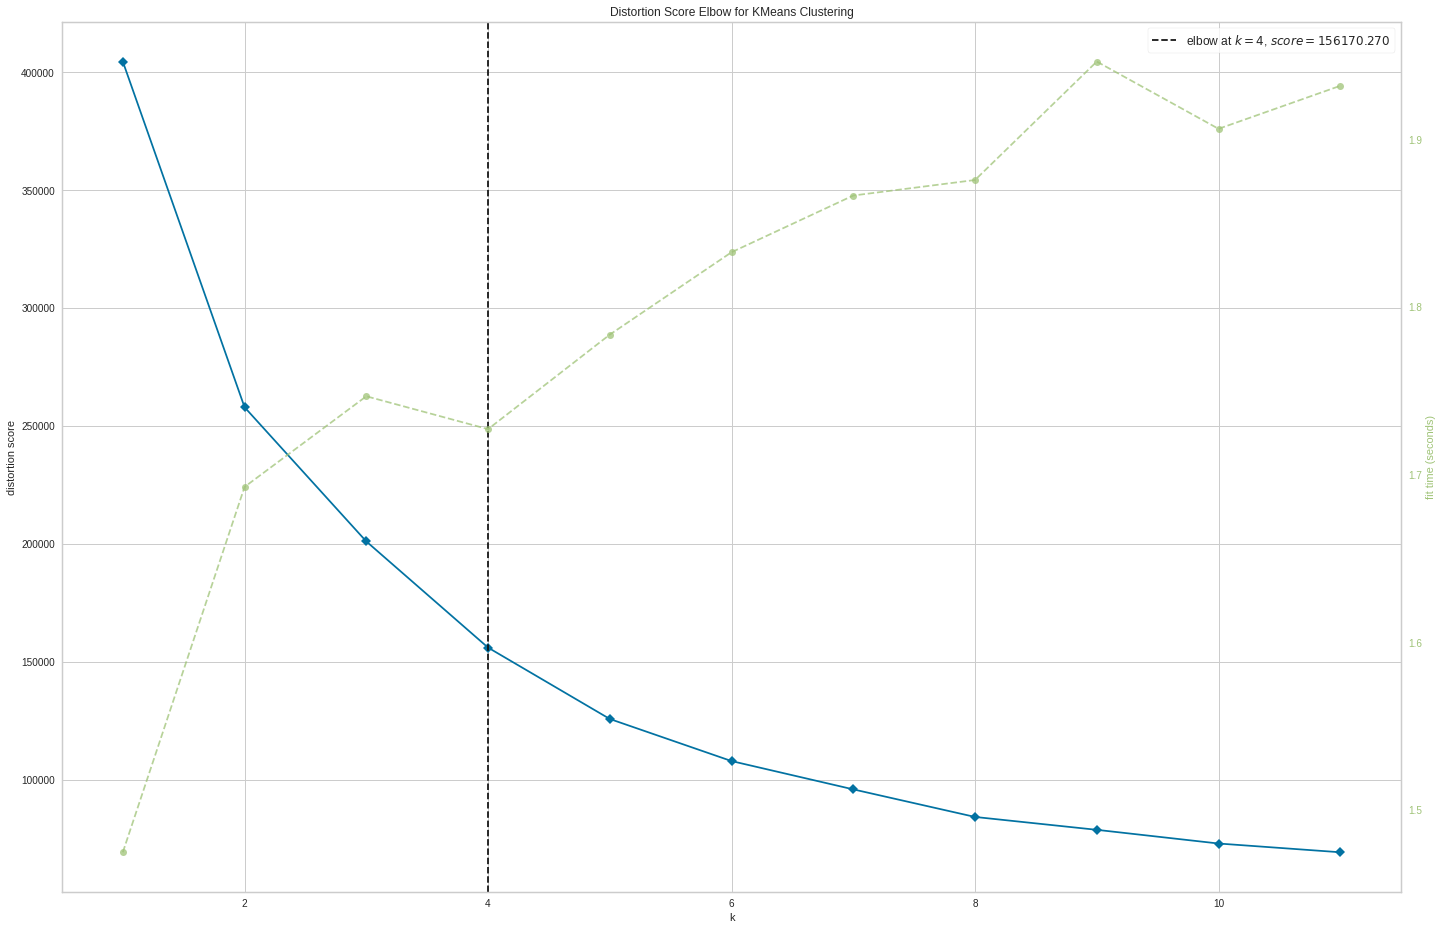

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# for df_log_scaled
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_log_scaled)
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.3709745068518108
For n_clusters = 3 The average silhouette_score is : 0.3671889462919416
For n_clusters = 4 The average silhouette_score is : 0.40765241227846777
For n_clusters = 5 The average silhouette_score is : 0.4514181630111937
For n_clusters = 6 The average silhouette_score is : 0.45788719922382665
For n_clusters = 7 The average silhouette_score is : 0.47917518592438185
For n_clusters = 8 The average silhouette_score is : 0.41311146441305885
For n_clusters = 9 The average silhouette_score is : 0.37415031714591596
For n_clusters = 10 The average silhouette_score is : 0.32523234761833913


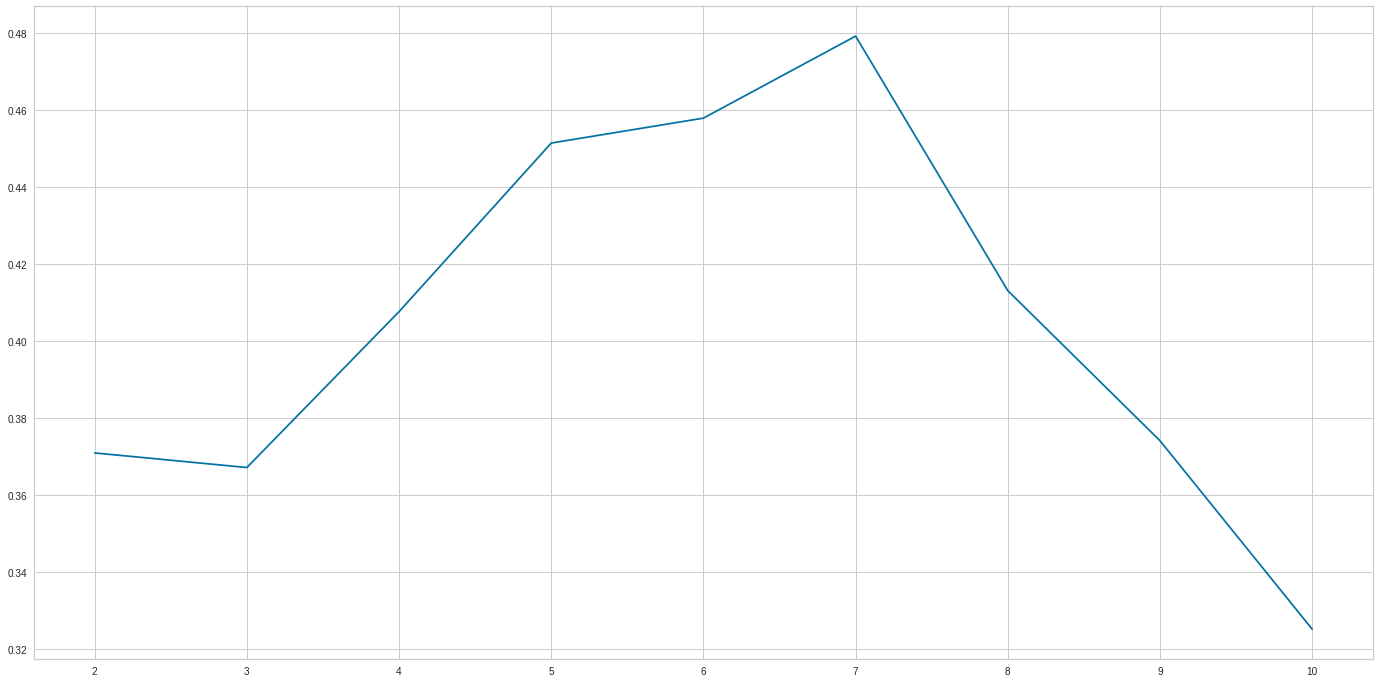

In [28]:
# evaluate according to silhouette score.
X = np.log1p(df_no_guessing)
scores = {}
for n_clusters in range(2, 11):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    scores[n_clusters] = silhouette_avg

plt.plot(scores.keys(), scores.values())  

For n_clusters = 2 The average silhouette_score is : 0.35261138559139577
For n_clusters = 3 The average silhouette_score is : 0.3452814208059838
For n_clusters = 4 The average silhouette_score is : 0.3766374214873746
For n_clusters = 5 The average silhouette_score is : 0.40692258080408444
For n_clusters = 6 The average silhouette_score is : 0.4152501094817876
For n_clusters = 7 The average silhouette_score is : 0.4274065345265388
For n_clusters = 8 The average silhouette_score is : 0.4519483748570843
For n_clusters = 9 The average silhouette_score is : 0.40759665046253923
For n_clusters = 10 The average silhouette_score is : 0.36899035713392125


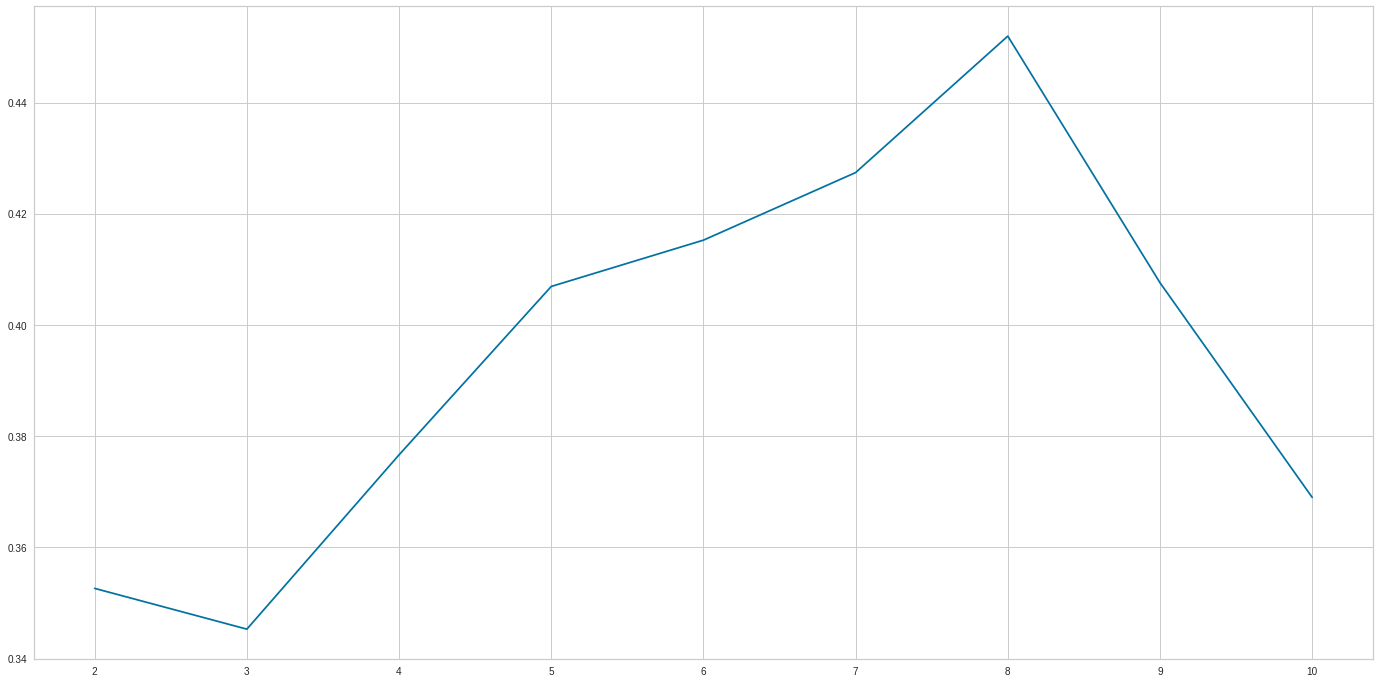

In [27]:
# evaluate according to silhouette score.
X = df_log_scaled

scores = {}
for n_clusters in range(2, 11):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    scores[n_clusters] = silhouette_avg

plt.plot(scores.keys(), scores.values())    

In [96]:
km = KMeans(n_clusters=7).fit(df)
tsne = TSNE(learning_rate=1, init='pca', n_jobs=-1)
result = tsne.fit_transform(df)

In [91]:
km.labels_

array([1, 4, 0, ..., 2, 2, 2], dtype=int32)

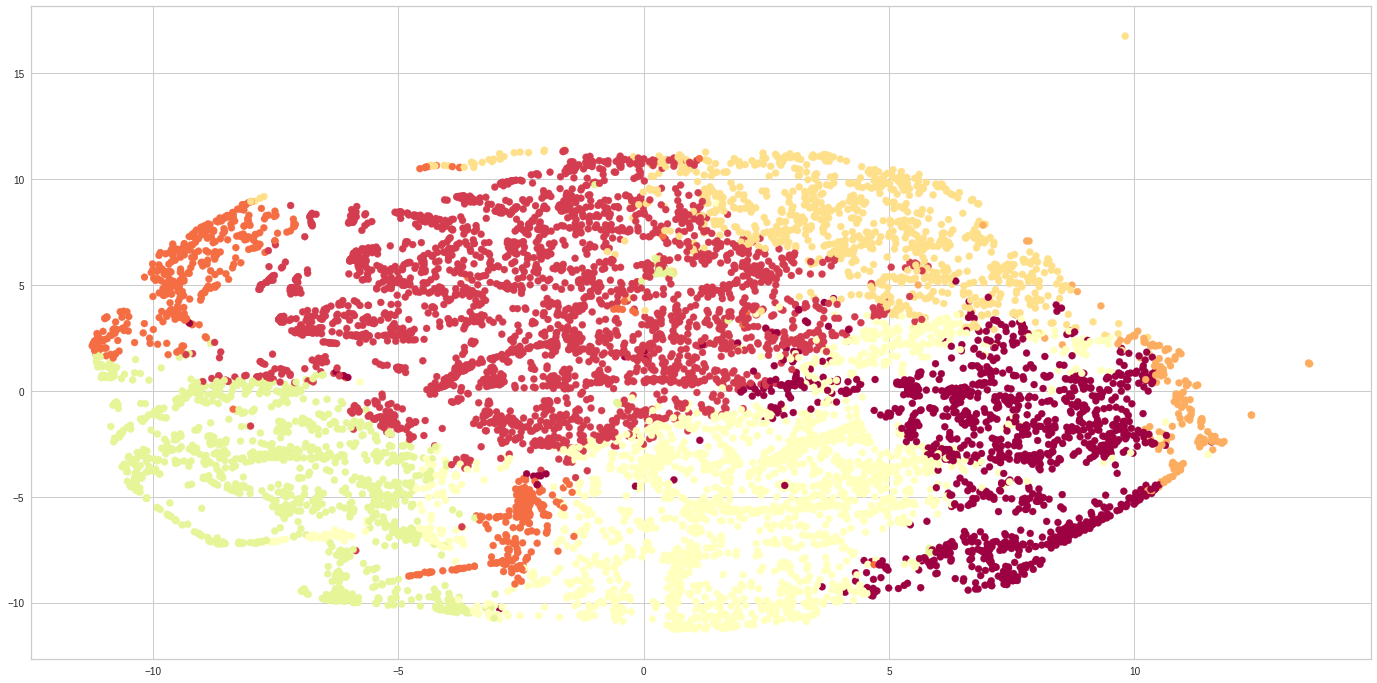

In [92]:
import matplotlib
plt.scatter(result[:, 0], result[:, 1], c=[plt.cm.Spectral(float(i) /10) for i in km.labels_])

### Hierarchical clustering:

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

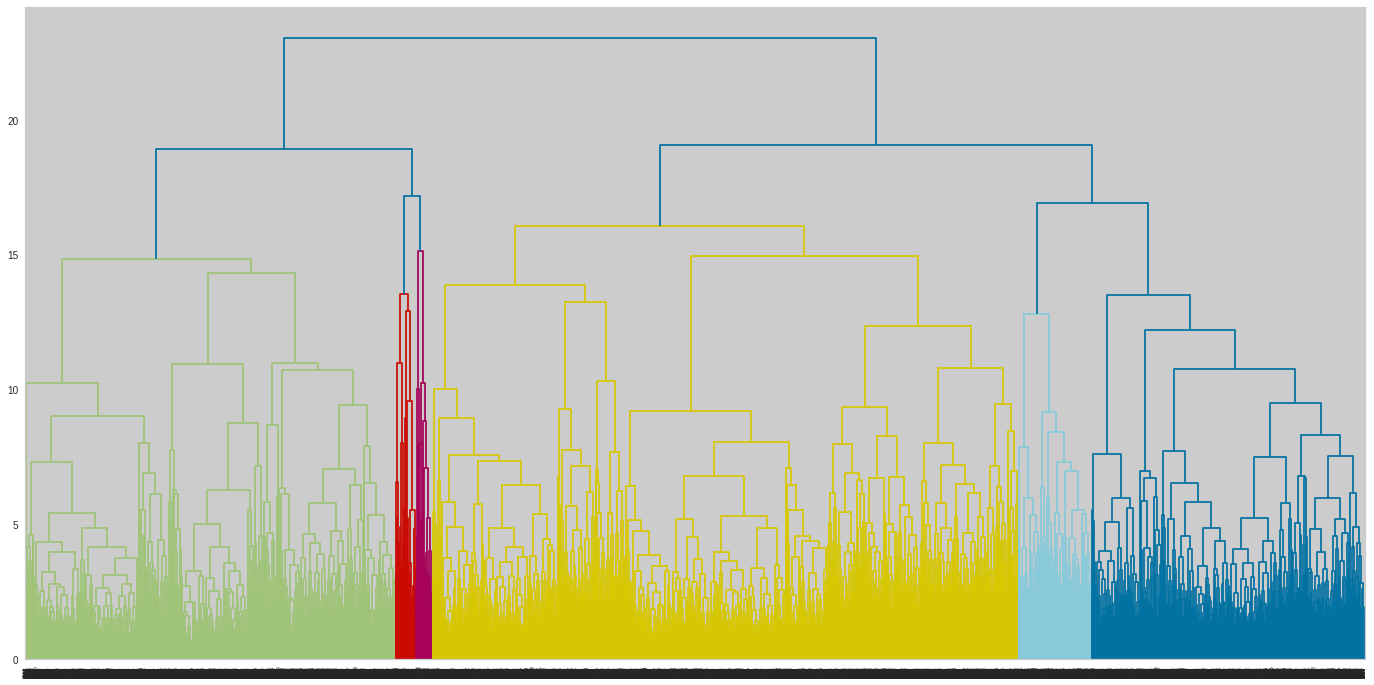

In [35]:
d_complete = dendrogram(linkage(df_log_scaled, method='complete', metric='euclidean'))
plt.show()

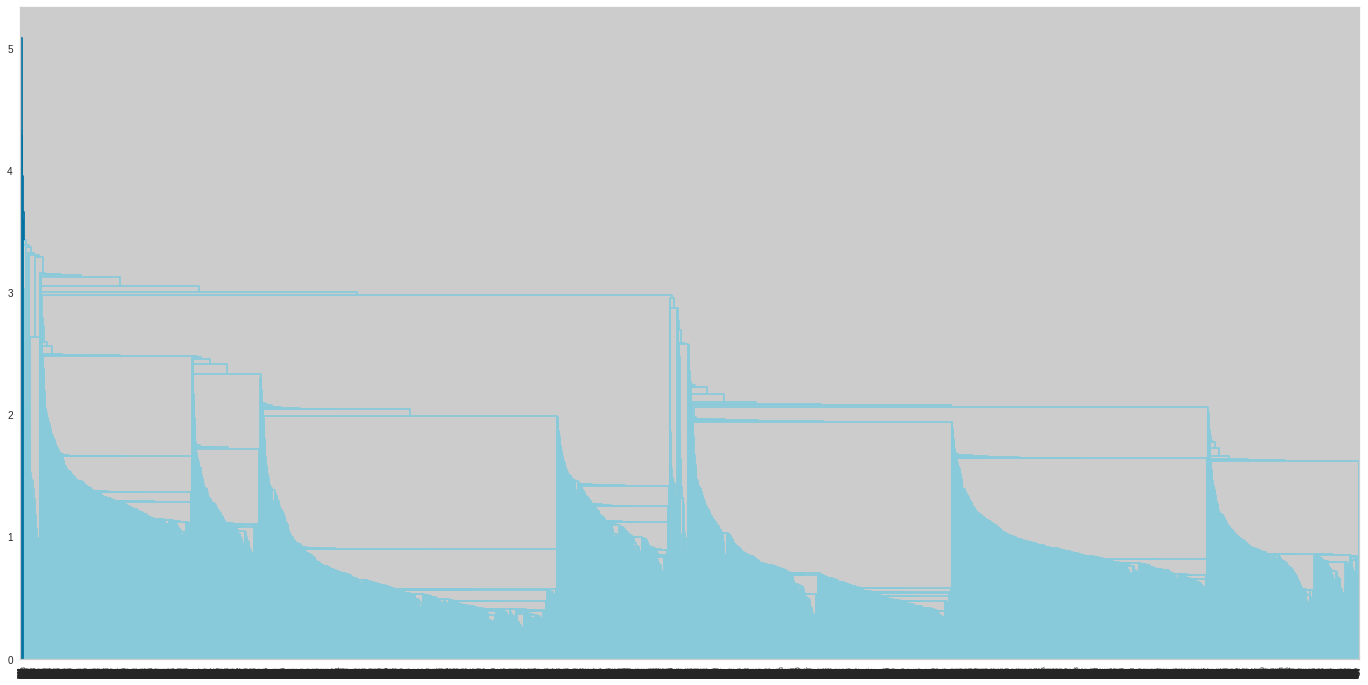

In [33]:
d_single = dendrogram(linkage(df_log_scaled, method='single', metric='euclidean'))
plt.show()

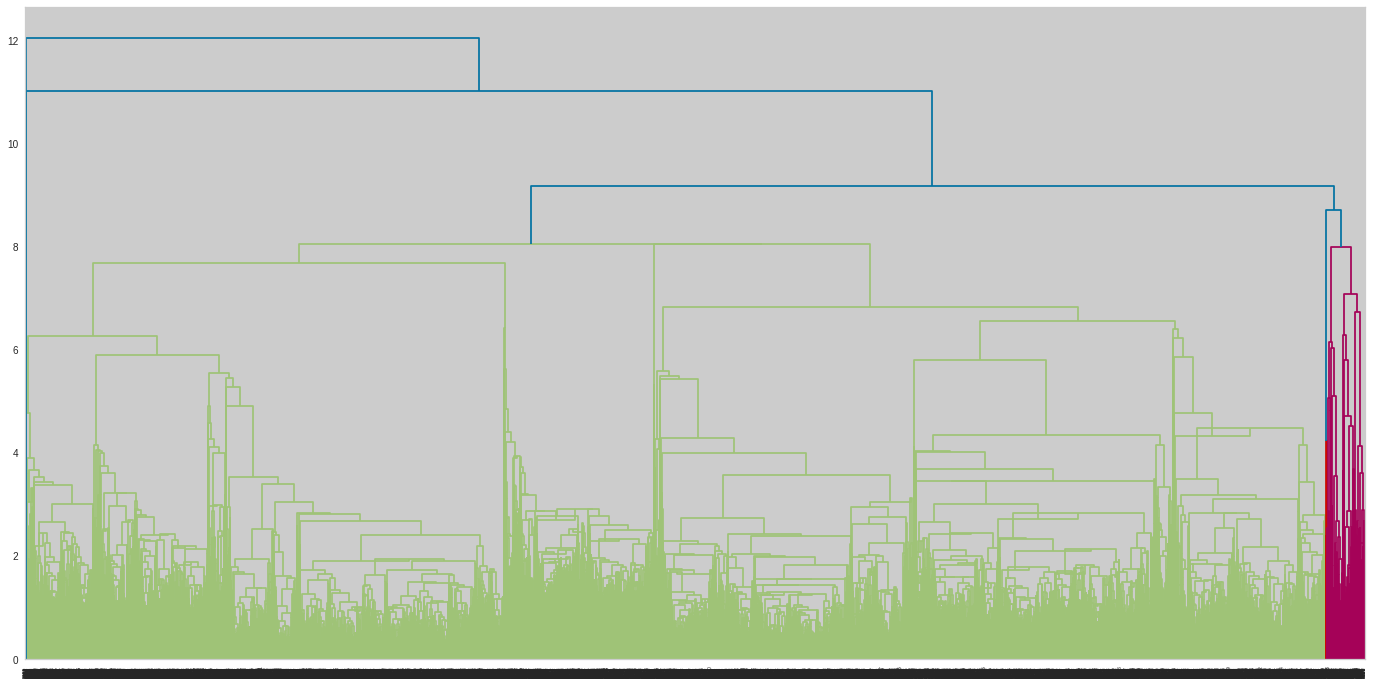

In [34]:
d_centroid = dendrogram(linkage(df_log_scaled, method='centroid', metric='euclidean'))
plt.show()

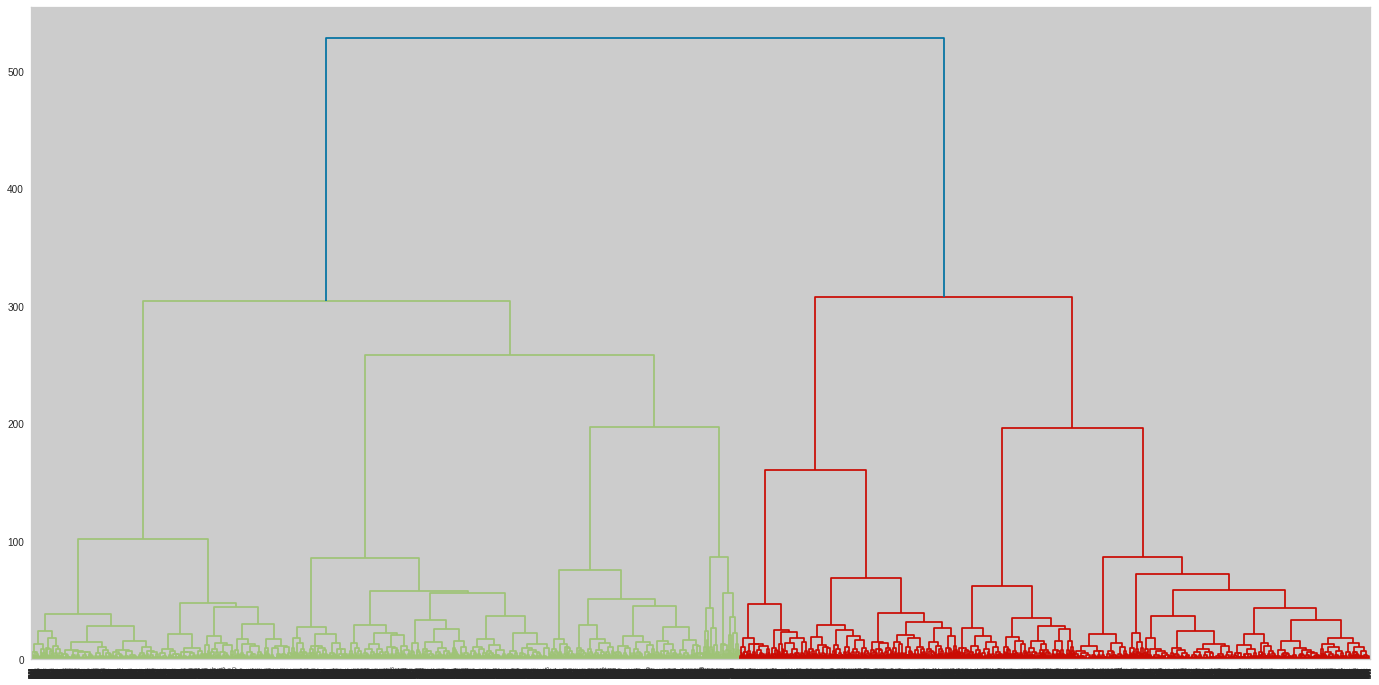

In [36]:
d_ward = dendrogram(linkage(df_log_scaled, method='ward', metric='euclidean'))
plt.show()

In [37]:
methods = ['complete', 'ward']

for method in methods:
    print()
    for n_clusters in range(2, 11):
        agg_clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        cluster_labels = agg_clusterer.fit_predict(df_log_scaled)
        silhouette_avg = silhouette_score(df_log_scaled, cluster_labels)
        print(
            "Method =",
            method,
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )


Method = complete For n_clusters = 2 The average silhouette_score is : 0.12756542154608036
Method = complete For n_clusters = 3 The average silhouette_score is : 0.16637134235719525
Method = complete For n_clusters = 4 The average silhouette_score is : 0.164631101153121
Method = complete For n_clusters = 5 The average silhouette_score is : 0.16176831968727604
Method = complete For n_clusters = 6 The average silhouette_score is : 0.1529714304856392
Method = complete For n_clusters = 7 The average silhouette_score is : 0.19103336442707455
Method = complete For n_clusters = 8 The average silhouette_score is : 0.19117303687468373
Method = complete For n_clusters = 9 The average silhouette_score is : 0.2172103609846592
Method = complete For n_clusters = 10 The average silhouette_score is : 0.24714583875201912
Method = ward For n_clusters = 2 The average silhouette_score is : 0.3420586035686824
Method = ward For n_clusters = 3 The average silhouette_score is : 0.3248126676562156
Method = war

### DBSCAN:

12


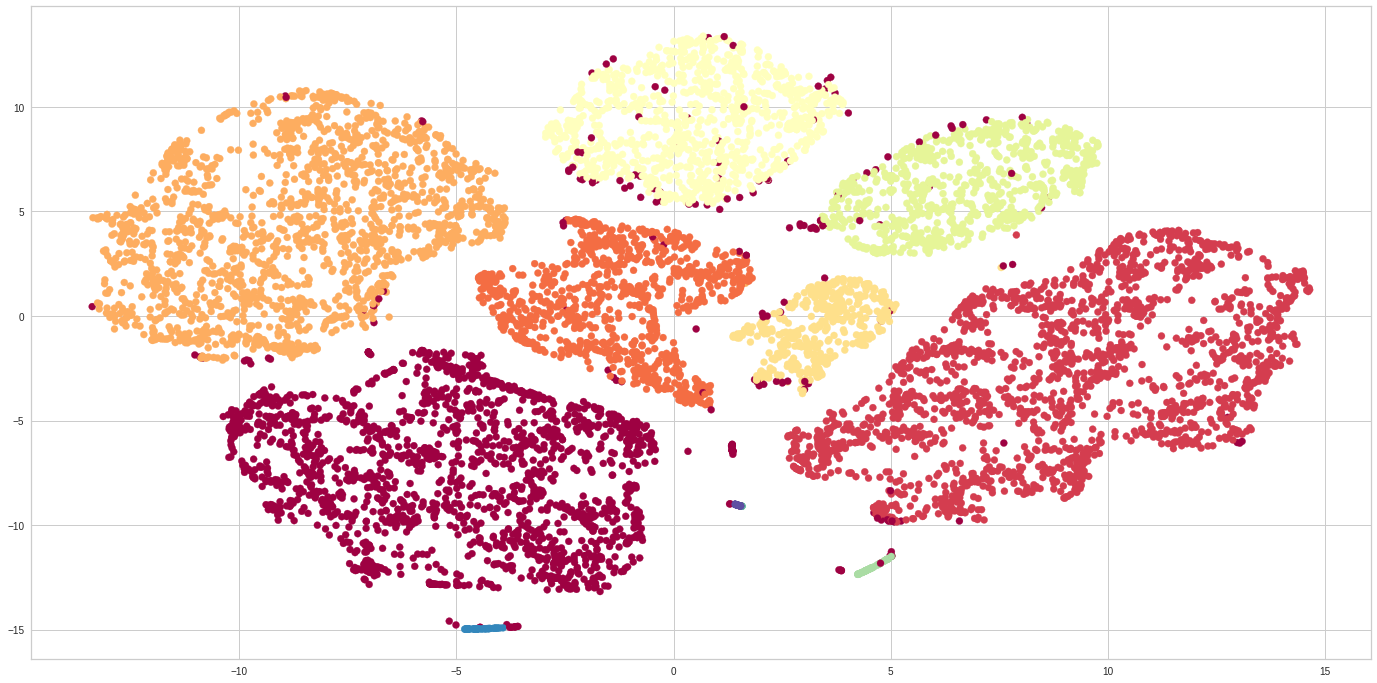

In [69]:
from sklearn.cluster import DBSCAN


db_clusterer = DBSCAN(eps=2, min_samples=10).fit(df_log_scaled)
print(len(set(db_clusterer.labels_)))
plt.scatter(result[:, 0], result[:, 1], c=[plt.cm.Spectral(float(i) /10) for i in db_clusterer.labels_])
plt.show()

(8949, 10)


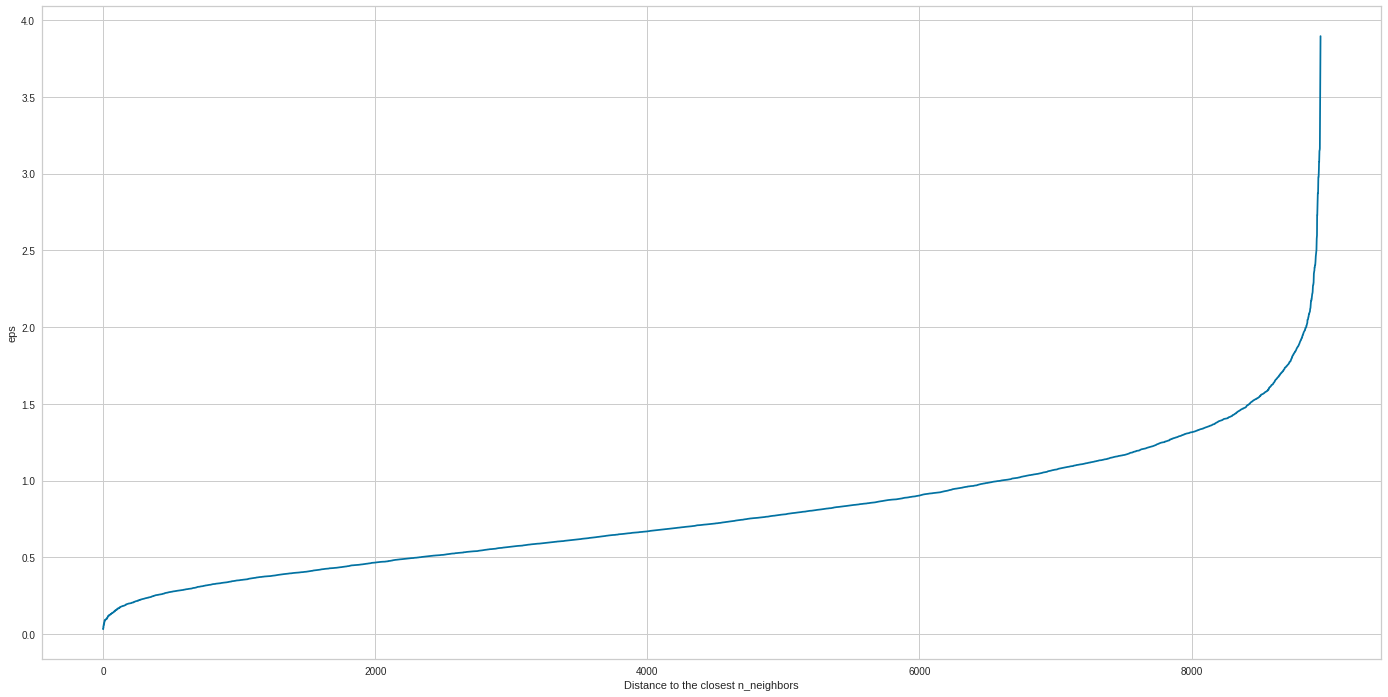

In [81]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10)
nbrs = nn.fit(df_log_scaled)
dists, neighbors = nbrs.kneighbors(df_log_scaled)
print(dists.shape)
dists = np.sort(dists, axis=0)
dists = dists[:, 1]

plt.xlabel("Distance to the closest n_neighbors")
plt.ylabel("eps")
plt.plot(dists)
plt.show()

In [82]:
eps = [i / 100 for i in range(140, 241, 10)]
min_points = range(1, 31, 2)

for e in eps:
    print()
    for mp in min_points:
        db_clusterer = DBSCAN(eps=e, min_samples=mp).fit(df_log_scaled)
        silhouette_avg = silhouette_score(df_log_scaled, db_clusterer.labels_)
        print(
            "eps =",
            e,
            "min_samples =",
            mp,
            "n_clusters =",
            len(set(db_clusterer.labels_)),
            "The average silhouette_score is :",
            silhouette_avg,
        )
        


eps = 1.4 min_samples = 1 n_clusters = 820 The average silhouette_score is : -0.26464466349395055
eps = 1.4 min_samples = 3 n_clusters = 40 The average silhouette_score is : 0.15738630503166406
eps = 1.4 min_samples = 5 n_clusters = 22 The average silhouette_score is : 0.24182665990197394
eps = 1.4 min_samples = 7 n_clusters = 17 The average silhouette_score is : 0.2230604257301948
eps = 1.4 min_samples = 9 n_clusters = 14 The average silhouette_score is : 0.24039517710086292
eps = 1.4 min_samples = 11 n_clusters = 13 The average silhouette_score is : 0.2688044806371396
eps = 1.4 min_samples = 13 n_clusters = 13 The average silhouette_score is : 0.26228967267042813
eps = 1.4 min_samples = 15 n_clusters = 12 The average silhouette_score is : 0.21877093551893323
eps = 1.4 min_samples = 17 n_clusters = 13 The average silhouette_score is : 0.14796975848037097
eps = 1.4 min_samples = 19 n_clusters = 10 The average silhouette_score is : 0.19869347402196758
eps = 1.4 min_samples = 21 n_clust

eps = 1.9 min_samples = 23 n_clusters = 10 The average silhouette_score is : 0.4116369849010501
eps = 1.9 min_samples = 25 n_clusters = 10 The average silhouette_score is : 0.40716047255555066
eps = 1.9 min_samples = 27 n_clusters = 10 The average silhouette_score is : 0.4030020504764092
eps = 1.9 min_samples = 29 n_clusters = 10 The average silhouette_score is : 0.40140328919151463

eps = 2.0 min_samples = 1 n_clusters = 135 The average silhouette_score is : -0.19983893439803505
eps = 2.0 min_samples = 3 n_clusters = 19 The average silhouette_score is : 0.17926151483848132
eps = 2.0 min_samples = 5 n_clusters = 11 The average silhouette_score is : 0.3178049116331917
eps = 2.0 min_samples = 7 n_clusters = 11 The average silhouette_score is : 0.39769545186211713
eps = 2.0 min_samples = 9 n_clusters = 11 The average silhouette_score is : 0.4380710384468162
eps = 2.0 min_samples = 11 n_clusters = 11 The average silhouette_score is : 0.43536812148168297
eps = 2.0 min_samples = 13 n_cluster

In [93]:
# Best resuly
# eps = 2.1 min_samples = 11 n_clusters = 11 The average silhouette_score is : 0.4388689321249829
db_clusterer = DBSCAN(eps=2.1, min_samples=11).fit(df_log_scaled)

# eps = 2.0 min_samples = 9 n_clusters = 11 The average silhouette_score is : 0.4380710384468162
# db_clusterer = DBSCAN(eps=2, min_samples=9).fit(df_log_scaled)
silhouette_avg = silhouette_score(df_log_scaled, db_clusterer.labels_)

n_clusters_ = len(set(db_clusterer.labels_)) - (1 if -1 in db_clusterer.labels_ else 0)
n_noise_ = list(db_clusterer.labels_).count(-1)

print(
    "n_clusters =",
    n_clusters_,
    "The average silhouette_score is :",
    silhouette_avg,
)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

n_clusters = 10 The average silhouette_score is : 0.4388689321249829
Estimated number of clusters: 10
Estimated number of noise points: 225


### GMM:

7


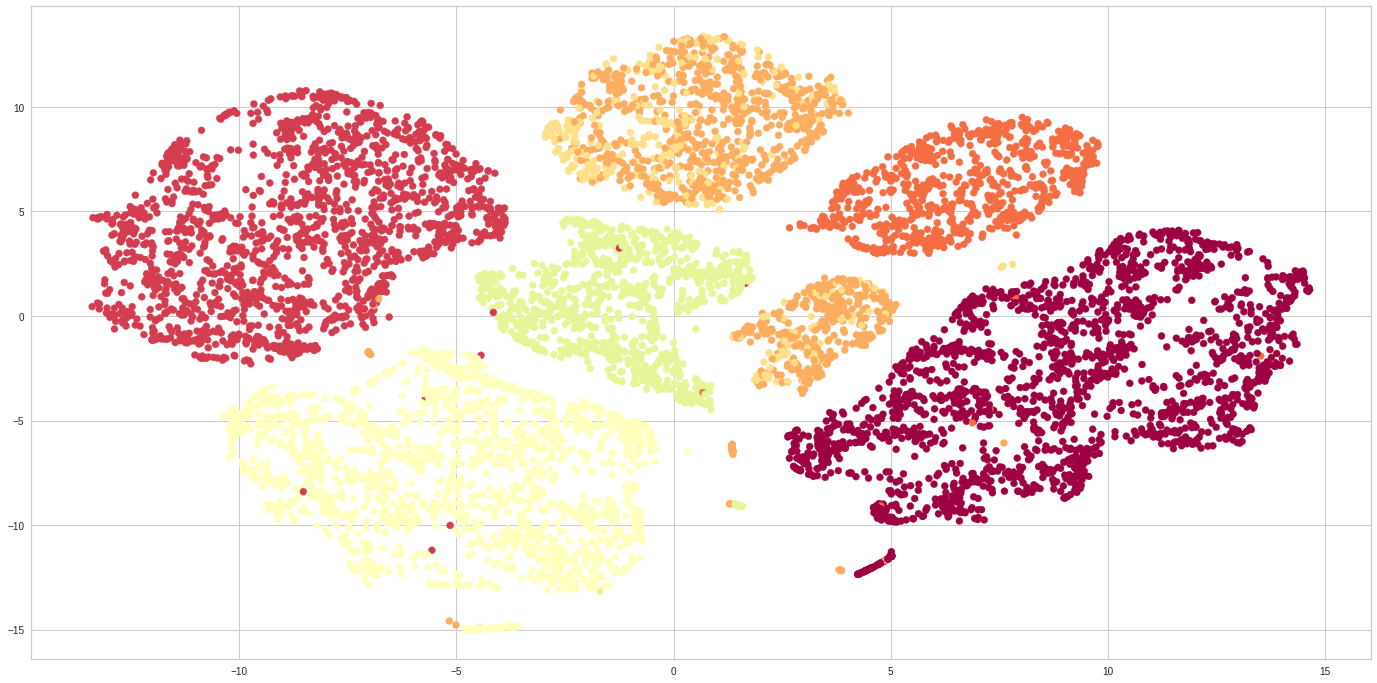

In [98]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

gm = GaussianMixture(n_components=7).fit(df)
labels = gm.predict(df)
print(len(set(labels)))
plt.scatter(result[:, 0], result[:, 1], c=[plt.cm.Spectral(float(i) /10) for i in labels])
plt.show()

In [100]:
for n_clusters in range(2, 11):
    print()
    gm = GaussianMixture(n_components=n_clusters)
    labels = gm.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)


    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)


For n_clusters = 2 The average silhouette_score is : 0.3487921556668435
Estimated number of clusters: 2
Estimated number of noise points: 0

For n_clusters = 3 The average silhouette_score is : 0.32976017751450915
Estimated number of clusters: 3
Estimated number of noise points: 0

For n_clusters = 4 The average silhouette_score is : 0.3600054111533753
Estimated number of clusters: 4
Estimated number of noise points: 0

For n_clusters = 5 The average silhouette_score is : 0.3653854244578619
Estimated number of clusters: 5
Estimated number of noise points: 0

For n_clusters = 6 The average silhouette_score is : 0.30977548520002346
Estimated number of clusters: 6
Estimated number of noise points: 0

For n_clusters = 7 The average silhouette_score is : 0.432051329934684
Estimated number of clusters: 7
Estimated number of noise points: 0

For n_clusters = 8 The average silhouette_score is : 0.33044946922570956
Estimated number of clusters: 8
Estimated number of noise points: 0

For n_clus

In [101]:
for n_clusters in range(2, 11):
    print()
    bgm = BayesianGaussianMixture(n_components=n_clusters)
    labels = bgm.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)


    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)


For n_clusters = 2 The average silhouette_score is : 0.3487921556668435
Estimated number of clusters: 2
Estimated number of noise points: 0

For n_clusters = 3 The average silhouette_score is : 0.32976017751450915
Estimated number of clusters: 3
Estimated number of noise points: 0

For n_clusters = 4 The average silhouette_score is : 0.3600054111533753
Estimated number of clusters: 4
Estimated number of noise points: 0

For n_clusters = 5 The average silhouette_score is : 0.38662579375896633
Estimated number of clusters: 5
Estimated number of noise points: 0

For n_clusters = 6 The average silhouette_score is : 0.4067289117349295
Estimated number of clusters: 6
Estimated number of noise points: 0

For n_clusters = 7 The average silhouette_score is : 0.39188105890507646
Estimated number of clusters: 7
Estimated number of noise points: 0

For n_clusters = 8 The average silhouette_score is : 0.32028578220264964
Estimated number of clusters: 8
Estimated number of noise points: 0

For n_cl